## Trajectory interpolation

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import pchip_interpolate
import matplotlib.pyplot as plt

Read preprocessed data and interpolated based on SOH

In [ ]:
# Interpolate Ah-throughput data for all cells in the NMC data
data_raw = pd.read_csv("NMC_data.csv")
path_data = "" # Path to the data folder -- change this to the path where the ISU-ILCC data is stored
valid_cells = pd.read_csv(path_data+'valid_cells.csv').values.flatten().tolist()

all_cell_df = pd.DataFrame(columns=['cellNum','cellID','Ah_throughput','qdis'])
all_cell_df_clean = pd.DataFrame(columns=['cellNum','cellID','Ah_throughput','qdis'])
x_interp = np.arange(0.8,1.001,0.01)
data_interp_dict = dict()
data_raw_dict = dict()
for i,cell in enumerate(valid_cells):
    data_cell = data_raw[data_raw["cellID"]==cell]
    
    # x is SOH and y is Ah-throughput
    x_raw = data_cell["qdis"].to_numpy()
    sort_idx = np.argsort(x_raw)
    x_raw_sort = x_raw[sort_idx]
    y_raw = data_cell["Ah_throughput"].to_numpy()
    y_raw_sort = y_raw[sort_idx]
    y_interp = pchip_interpolate(x_raw_sort,y_raw_sort,x_interp)

    interp_sort_idx = np.argsort(y_interp)
    
    data_raw_dict[cell]=np.vstack((y_raw,x_raw))
    data_interp_dict[cell]=np.vstack((y_interp[interp_sort_idx],x_interp[interp_sort_idx]))

    cell_df = pd.DataFrame(columns=['cellNum','cellID','Ah_throughput','qdis'])
    cell_df["Ah_throughput"] = y_interp[interp_sort_idx]
    cell_df["qdis"] = x_interp[interp_sort_idx]
    cell_df["cellNum"]= i+1
    cell_df['cellID'] = cell

    all_cell_df = pd.concat([all_cell_df,cell_df],ignore_index=True)

    # Check if the cell has 10 data points before 70% and 5 data points before 80%
    counts = x_raw>=0.7
    counts_1 = x_raw>=0.8
    if sum(counts)>=10 and sum(counts_1)>=5:
        all_cell_df_clean = pd.concat([all_cell_df_clean,cell_df],ignore_index=True)
    
all_cell_df.to_csv('NMC_data_interp.csv',index=False)
all_cell_df_clean.to_csv('NMC_data_interp_clean.csv',index=False)
    

C:\Users\til22008\AppData\Local\Temp\ipykernel_49660\2991348750.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_cell_df = pd.concat([all_cell_df,cell_df],ignore_index=True)
C:\Users\til22008\AppData\Local\Temp\ipykernel_49660\2991348750.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_cell_df_clean = pd.concat([all_cell_df_clean,cell_df],ignore_index=True)


In [ ]:
# Interpolate time data for all cells in the NMC data
all_cell_df = pd.DataFrame(columns=['cellNum','cellID','t','qdis'])
all_cell_df_clean = pd.DataFrame(columns=['cellNum','cellID','t','qdis'])
x_interp = np.arange(0.8,1.001,0.01)
data_interp_dict = dict()
data_raw_dict = dict()
for i,cell in enumerate(valid_cells):
    data_cell = data_raw[data_raw["cellID"]==cell]
    
    # x is SOH and y is Ah-throughput
    x_raw = data_cell["qdis"].to_numpy()
    sort_idx = np.argsort(x_raw)
    x_raw_sort = x_raw[sort_idx]
    y_raw = data_cell["t"].to_numpy()
    y_raw_sort = y_raw[sort_idx]
    y_interp = pchip_interpolate(x_raw_sort,y_raw_sort,x_interp)

    interp_sort_idx = np.argsort(y_interp)
    
    data_raw_dict[cell]=np.vstack((y_raw,x_raw))
    data_interp_dict[cell]=np.vstack((y_interp[interp_sort_idx],x_interp[interp_sort_idx]))

    cell_df = pd.DataFrame(columns=['cellNum','cellID','t','qdis'])
    cell_df["t"] = y_interp[interp_sort_idx]
    cell_df["qdis"] = x_interp[interp_sort_idx]
    cell_df["cellNum"]= i+1
    cell_df['cellID'] = cell

    all_cell_df = pd.concat([all_cell_df,cell_df],ignore_index=True)

    # Check if the cell has 10 data points before 70% and 5 data points before 80%
    counts = x_raw>=0.7
    counts_1 = x_raw>=0.8
    if sum(counts)>=10 and sum(counts_1)>=5:
        all_cell_df_clean = pd.concat([all_cell_df_clean,cell_df],ignore_index=True)

all_cell_df.to_csv('NMC_data_interp_time.csv',index=False)
all_cell_df_clean.to_csv('NMC_data_interp_time_clean.csv',index=False)

C:\Users\til22008\AppData\Local\Temp\ipykernel_49660\1117778775.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_cell_df = pd.concat([all_cell_df,cell_df],ignore_index=True)
C:\Users\til22008\AppData\Local\Temp\ipykernel_49660\1117778775.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_cell_df_clean = pd.concat([all_cell_df_clean,cell_df],ignore_index=True)


Visualize the effect of interpolation

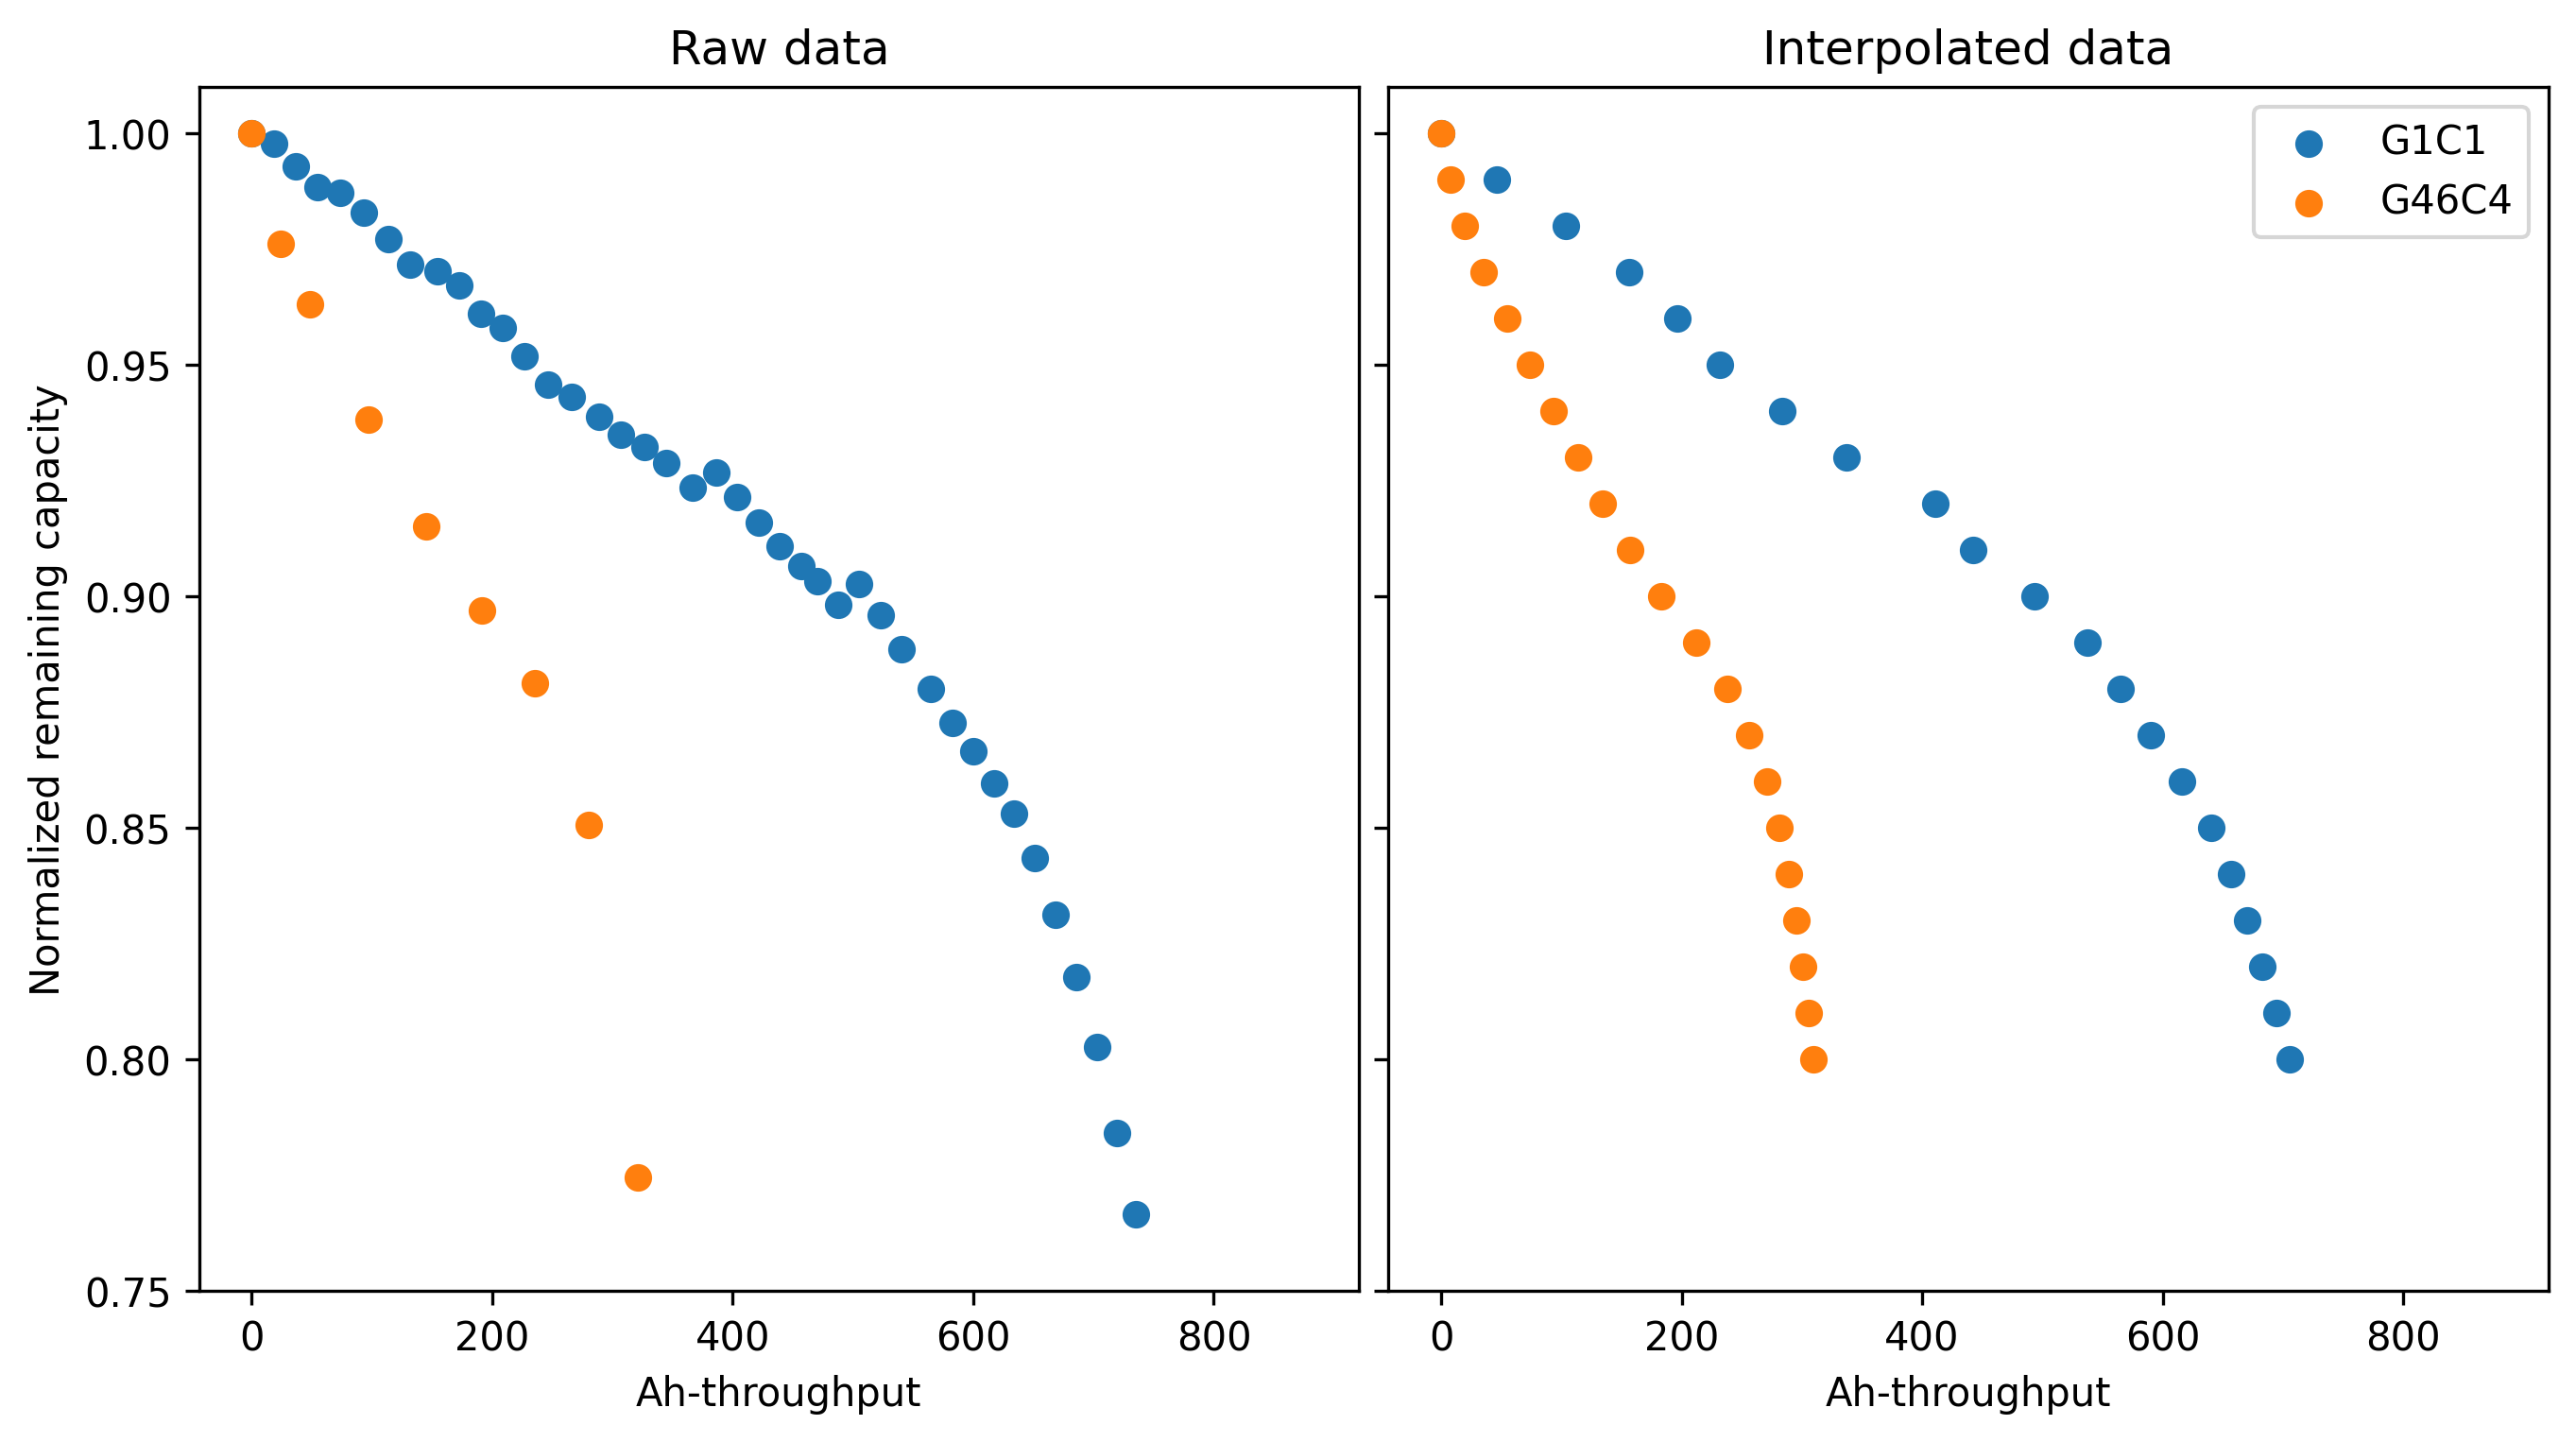

In [4]:
cells = ["G1C1","G46C4"]

fig,ax = plt.subplots(1,2,figsize=(9,5),sharey=True,sharex=True,dpi=300)
for iii,cell in enumerate(cells):
    ax[0].scatter(data_raw_dict[cell][0,:],data_raw_dict[cell][1,:],label=cell)
    ax[0].set_xlabel("Ah-throughput")
    ax[0].set_ylabel("Normalized remaining capacity")
    ax[0].set_title("Raw data")
    ax[0].set_ylim([0.75,1.01])

    ax[1].scatter(data_interp_dict[cell][0,:],data_interp_dict[cell][1,:],label=cell)
    ax[1].set_xlabel("Ah-throughput")
    ax[1].set_title("Interpolated data")

plt.legend()
plt.tight_layout(pad=0.4)
plt.show()

    



Train/test split

In [ ]:
# Train/test split based on groups
training_group = ['G10', 'G14', 'G16', 'G19', 'G2', 'G20', 'G22', 'G23', 'G25', 
            'G27', 'G28', 'G3', 'G30', 'G31', 'G35', 'G36', 'G38', 'G4', 
            'G41', 'G45', 'G47', 'G48', 'G5', 'G51', 'G52', 'G53', 'G55', 
            'G60', 'G62', 'G7']

test_in_group = ['G13', 'G17', 'G21', 'G24', 'G29', 'G33', 'G37', 'G39', 'G46', 
            'G56', 'G58', 'G61', 'G63', 'G64', 'G8', 'G9']
test_out_group = ['G1', 'G12', 'G18', 'G26', 'G32', 'G34', 'G40', 'G42', 'G43', 
            'G44','G49', 'G50', 'G54', 'G57', 'G59', 'G6']


training_cells_all_possible = [iii+suffix for iii in training_group for suffix in ['C1', 'C2', 'C3', 'C4']]
test_in_cells_all_possible = [iii+suffix for iii in test_in_group for suffix in ['C1', 'C2', 'C3', 'C4']]
test_out_cells_all_possible = [iii+suffix for iii in test_out_group for suffix in ['C1', 'C2', 'C3', 'C4']]

cell_list_1 = np.unique(all_cell_df_clean['cellID']).tolist()

training_cell = []
test_in_cell = []
test_out_cell = []

for cell in cell_list_1:
    if cell in training_cells_all_possible:
        training_cell.append(cell)
    elif cell in test_in_cells_all_possible:
        test_in_cell.append(cell)
    elif cell in test_out_cells_all_possible:
        test_out_cell.append(cell)
    else:
        ValueError(cell+" is not in list")


In [ ]:
import csv
# Write the list to a CSV file
with open('training.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for item in training_cell:
        writer.writerow([item])

with open('test_in.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for item in test_in_cell:
        writer.writerow([item])

with open('test_out.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for item in test_out_cell:
        writer.writerow([item])